[View in Colaboratory](https://colab.research.google.com/github/HectorPulido/Python-And-Datascience-Test/blob/master/NumpyAndPylabTest.ipynb)

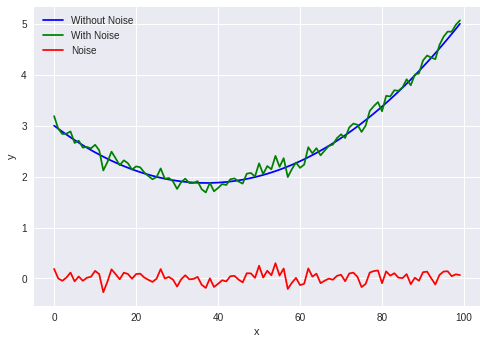

In [18]:
import matplotlib.pyplot
import numpy

x = numpy.linspace(-1,1,100) # 100 numeros del -1 al 1
signal = 2 + x + 2 * x * x 
noise = numpy.random.normal(0, 0.1, 100) # se crean 100 numeros aleatorios iniciando en 0, con 0.1 de desviacion estandar
y = signal + noise 
pylab.plot(signal,'b'); #Señal pura
pylab.plot(y,'g')  #Señal mas ruido
pylab.plot(noise, 'r') 
pylab.xlabel("x") 
pylab.ylabel("y") 
pylab.legend(["Without Noise", "With Noise", "Noise"], loc = 2) 

x_train = x[0:80] 
y_train = y[0:80]


('Train RMSE (Degree = ', 2, '})', 3.727666748311206)
('Test RMSE (Degree = ', 2, ')', 7.710326090608508)
('Train RMSE (Degree = ', 4, '})', 0.9426647587535726)
('Test RMSE (Degree = ', 4, ')', 0.3628672098529048)
('Train RMSE (Degree = ', 6, '})', 0.9315058859605648)
('Test RMSE (Degree = ', 6, ')', 3.74183962471223)
('Train RMSE (Degree = ', 8, '})', 0.8836789183946471)
('Test RMSE (Degree = ', 8, ')', 2.7707137710255645)


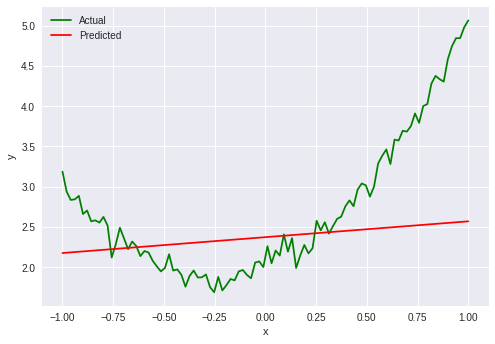

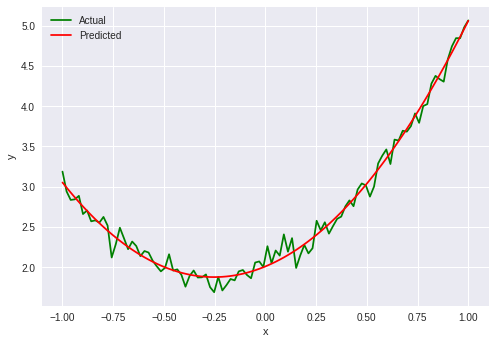

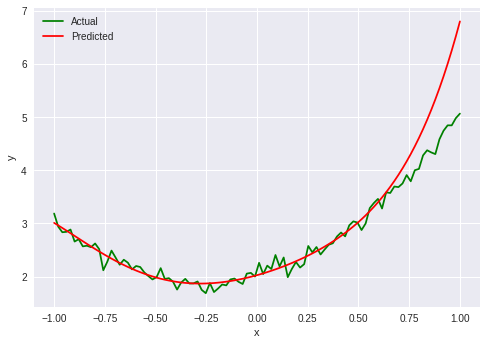

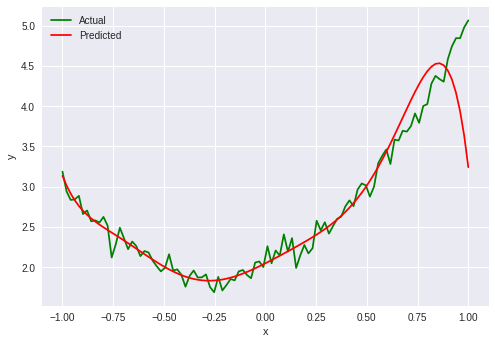

In [50]:
#Model 1
for degree in range(2, 10, 2):
  pylab.figure() #Genera nueva figura
  #degree = 2

  X_train = numpy.column_stack([numpy.power(x_train,i) for i in xrange(0,degree)]) # Numpy.solumn_stack genera un array 2D con los datos que se le pongan como parametros
  #En este caso los datos son x_train, elevado a los numeros de cero a degree - 1, osea de 0 a 1

  model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train) # (X_train.T * X_train).I * X_train.T) * y_train
  #X_train.T * X_train <- Genera matriz cuadrada
  #(X_train.T * X_train).I <- Es la inversa de esa matriz

  pylab.plot(x,y,'g') 
  pylab.xlabel("x")
  pylab.ylabel("y") 

  predicted = numpy.dot(model, [numpy.power(x,i) for i in xrange(0,degree)]) #Se generan las predicciones haciendo punto entre el modelo y X, desde cero hasta el grado

  pylab.plot(x, predicted,'r') 
  pylab.legend(["Actual", "Predicted"], loc = 2) 

  train_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) #MEAN SQUARE ERROR
  test_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 

  print("Train RMSE (Degree = ",degree,"})", train_rmse1) 
  print("Test RMSE (Degree = ",degree,")", test_rmse1)

  #Al grado 6 el overfitting se vuelve evidente

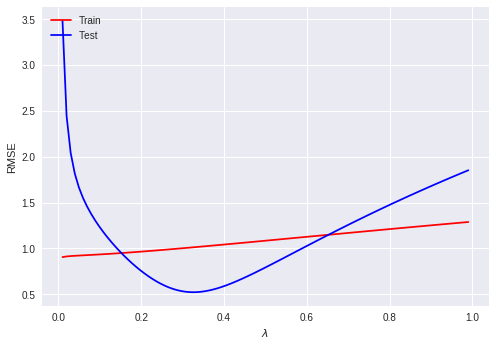

In [54]:
#Regularization
train_rmse = [] 
test_rmse = [] 
degree = 80
lambda_reg_values = numpy.linspace(0.01,0.99,100)

for lambda_reg in lambda_reg_values:    
  X_train = numpy.column_stack([numpy.power(x_train,i) for i in xrange(0,degree)])    
  model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train) + lambda_reg * numpy.identity(degree)),X_train.transpose()),y_train)    
  #Nuevo modelo (X.T*X-Lambda).I * X.T*Y se agrega el lambda
  predicted = numpy.dot(model, [numpy.power(x,i) for i in xrange(0,degree)])   
  #Prediccion model * x
  
  train_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80],  y_train - predicted[0:80]))))    
  test_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:],  y[80:] - predicted[80:]))))
  
pylab.plot(lambda_reg_values, train_rmse, 'r') 
pylab.plot(lambda_reg_values, test_rmse, 'b') 
pylab.xlabel(r"$\lambda$") 
pylab.ylabel("RMSE") 
pylab.legend(["Train", "Test"], loc = 2)
